# Garbage CNN

## Dataset: [TrashNet](https://www.kaggle.com/asdasdasasdas/garbage-classification) 

In [1]:
#datapath = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification'
datapath = '/home/rkuo/Datasets/TrashNet'

In [ ]:
!rm /home/rkuo/Datasets/TrashNet/*.txt

In [2]:
import os
labels = sorted(os.listdir(datapath))
print(labels)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


## Show images of Dataset

In [3]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, labels, top=10):
    for label in labels:
        print(label)
        all_item_dirs = os.listdir(item_dir+"/"+label)
        item_files = [os.path.join(item_dir+"/"+label, file) for file in all_item_dirs][:5]
  
        plt.figure(figsize=(10, 10))
  
        for idx, img_path in enumerate(item_files):
            plt.subplot(5, 5, idx+1)
    
            img = plt.imread(img_path)
            plt.tight_layout()     
            plt.imshow(img)
        plt.show()

cardboard


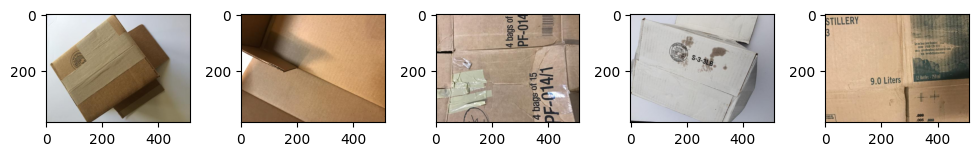

glass


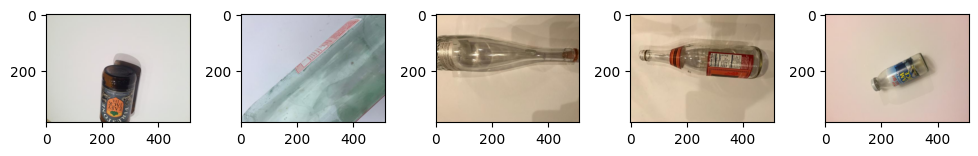

metal


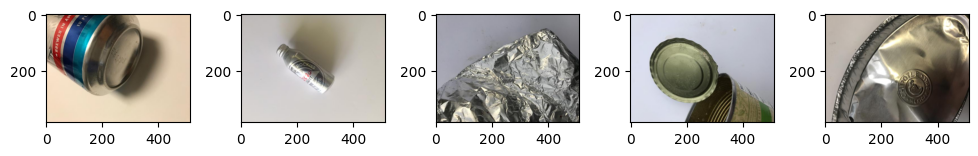

paper


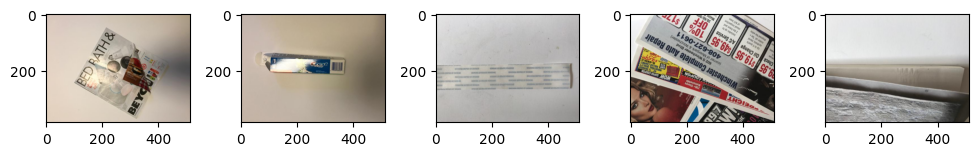

plastic


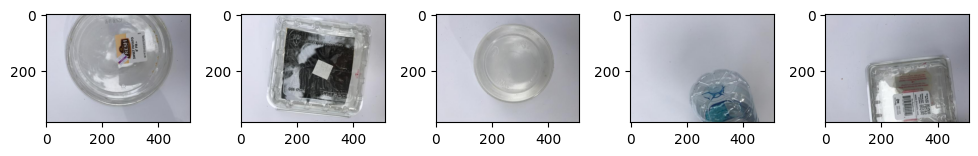

trash


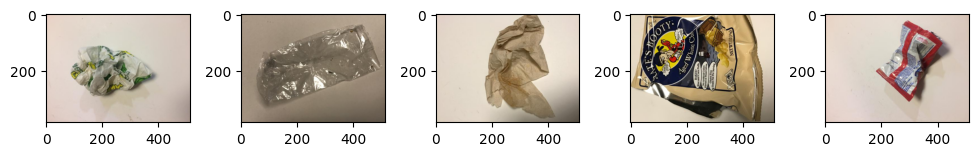

In [4]:
plot_imgs(datapath, labels)

## Data Generator

In [5]:
batch_size = 16
target_size = (224,224) #512x384

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2,                                 
                                 horizontal_flip=True, 
                                 vertical_flip=True,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                )

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator=train_datagen.flow_from_directory(datapath,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training')

test_generator=test_datagen.flow_from_directory(datapath,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

2024-04-21 21:44:36.409889: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 21:44:36.430558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 21:44:36.772311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [7]:
labels = list(train_generator.class_indices.keys())
print(labels)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


## Build Model

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
num_classes = len(labels)
input_shape = (224,224,3)

In [10]:
# Build Model
model = models.Sequential()
# 1st convolution layer   
model.add(Conv2D(16,(3,3), padding='same', input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
# 2nd convolution layer
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization())
# 3rd convolution layer
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
# 4th convolution layer
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization())
# 5th convolution layer
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
# 6th convolution layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
# fully-connected layers
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

/home/rkuo/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-21 21:44:59.292380: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-21 21:44:59.311997: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-21 21:44:59.312089: I e

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           39

 Total params: 6,362,406 (24.27 MB)

 Trainable params: 6,360,390 (24.26 MB)

 Non-trainable params: 2,016 (7.88 KB)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [12]:
history = model.fit(train_generator, validation_data=test_generator, epochs=200)

Epoch 1/200


/home/rkuo/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1713707119.755245   74468 service.cc:145] XLA service 0x7be57801def0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713707119.755262   74468 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-04-21 21:45:19.797012: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-21 21:45:19.971828: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  5/127 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2735 - loss: 2.5786

I0000 00:00:1713707124.069025   74468 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 65/127 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.3752 - loss: 2.3123

I0000 00:00:1713707129.574709   74472 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 36 bytes spill stores, 36 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.3913 - loss: 2.0783 - val_accuracy: 0.2346 - val_loss: 1.9712
Epoch 2/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.4493 - loss: 1.3649 - val_accuracy: 0.2545 - val_loss: 2.4475
Epoch 3/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.5022 - loss: 1.3321 - val_accuracy: 0.2068 - val_loss: 4.8167
Epoch 4/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.5275 - loss: 1.3032 - val_accuracy: 0.3559 - val_loss: 1.6708
Epoch 5/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.5426 - loss: 1.1891 - val_accuracy: 0.4155 - val_loss: 2.0074
Epoch 6/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.5819 - loss: 1.0842 - val_accuracy: 0.3459 - val_loss: 1.7182
Epoch 7/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6258 - loss: 1.0603 - val_accuracy: 0.2366 - val_loss: 7.6931
Epoch 8/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6341 - loss: 0.9812 - val_accurac

Epoch 51/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9048 - loss: 0.2903 - val_accuracy: 0.6402 - val_loss: 1.2423
Epoch 52/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8919 - loss: 0.3086 - val_accuracy: 0.6421 - val_loss: 1.2880
Epoch 53/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9176 - loss: 0.2786 - val_accuracy: 0.6779 - val_loss: 1.2233
Epoch 54/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8965 - loss: 0.2888 - val_accuracy: 0.4911 - val_loss: 1.9955
Epoch 55/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9199 - loss: 0.2418 - val_accuracy: 0.6243 - val_loss: 1.3438
Epoch 56/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9039 - loss: 0.2740 - val_accuracy: 0.5368 - val_loss: 1.9959
Epoch 57/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9108 - loss: 0.2651 - val_accuracy: 0.7117 - val_loss: 1.1019
Epoch 58/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9165 - loss: 0

127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9521 - loss: 0.1522 - val_accuracy: 0.7097 - val_loss: 1.3318
Epoch 101/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9657 - loss: 0.1016 - val_accuracy: 0.6064 - val_loss: 2.2428
Epoch 102/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9738 - loss: 0.0908 - val_accuracy: 0.7455 - val_loss: 1.0753
Epoch 103/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9598 - loss: 0.1145 - val_accuracy: 0.6799 - val_loss: 1.3593
Epoch 104/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9754 - loss: 0.0805 - val_accuracy: 0.6859 - val_loss: 1.7398
Epoch 105/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9694 - loss: 0.1054 - val_accuracy: 0.7316 - val_loss: 1.2434
Epoch 106/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9619 - loss: 0.0994 - val_accuracy: 0.7416 - val_loss: 1.1122
Epoch 107/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9625 - loss: 0.0900 

127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9767 - loss: 0.0797 - val_accuracy: 0.5408 - val_loss: 3.2454
Epoch 150/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9862 - loss: 0.0542 - val_accuracy: 0.6600 - val_loss: 1.7056
Epoch 151/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9806 - loss: 0.0957 - val_accuracy: 0.7654 - val_loss: 1.1310
Epoch 152/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9768 - loss: 0.0700 - val_accuracy: 0.4254 - val_loss: 6.8390
Epoch 153/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9726 - loss: 0.0814 - val_accuracy: 0.5427 - val_loss: 3.4022
Epoch 154/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9725 - loss: 0.0687 - val_accuracy: 0.7197 - val_loss: 1.5743
Epoch 155/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9785 - loss: 0.0565 - val_accuracy: 0.5070 - val_loss: 3.9930
Epoch 156/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9788 - loss: 0.0605 

127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9760 - loss: 0.0935 - val_accuracy: 0.7137 - val_loss: 1.5721
Epoch 199/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9766 - loss: 0.0683 - val_accuracy: 0.4990 - val_loss: 3.8010
Epoch 200/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9770 - loss: 0.0627 - val_accuracy: 0.7078 - val_loss: 2.0084


## Save Model

In [ ]:
model.save('garbage_cnn.h5')

## Evaluate Model

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test loss     :", test_loss)
print("Test accuracy :", test_acc）

## Training History

In [ ]:
def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
preds=model.predict(test_generator)
y_pred = np.argmax(preds,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

### Classification Report

In [ ]:
print(classification_report(y_actual, y_pred, target_names=labels))

## Paper: [Fine-Tuning Models Comparisons on Garbage Classification for Recyclebility](https://arxiv.org/ftp/arxiv/papers/1908/1908.04393.pdf)

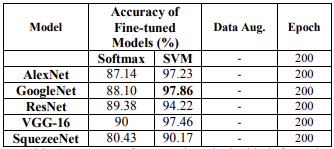

## Paper: [Comparative Analysis of Multiple Deep CNN Models for Waste Classification](https://arxiv.org/pdf/2004.02168.pdf)
### ResNet18 performance is best (accuracy=87%)
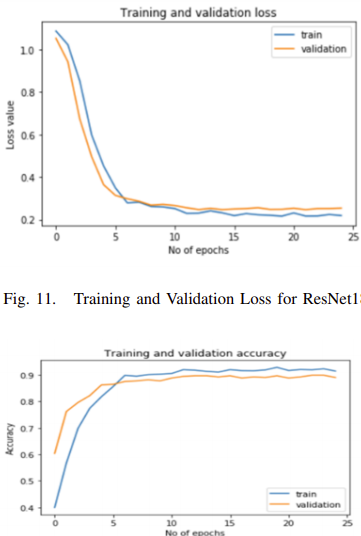
